# Data Extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file1 = pd.read_excel(r"C:\Users\user\Downloads\incorporated.xlsx")
file2 = pd.read_excel(r"C:\Users\user\Downloads\standalone.xlsx")

In [2]:
file1.head()

,INCORPORATED SYSTEM,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,t,T_h,DT,T_m,P_TE,N,Psi,S_gen,Irr,NaN,NaN,NaN
1,h,K,K,K,W,%,%,W/K,W,NaN,Inputs,Meaning
2,8,310.396,17.396,301.698,0.094405,0.615804,0.659852,0.002932,0.859186,NaN,t,Time
3,8.016667,310.894,17.894,301.947,0.099845,0.633208,0.678502,0.003097,0.907555,NaN,T_h,Hot junction temperature
4,8.033333,311.461,18.461,302.2305,0.10622,0.653008,0.699718,0.003291,0.964138,NaN,DT,Temperature gradient


In [3]:
file2.head()

,STAND-ALONE SYSTEM,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,t,T_h,T_h,DT,T_m,P_TE,N,Psi,S_gen,Irr,NaN,NaN,NaN
1,h,C,K,K,K,W,%,%,W/K,W,NaN,NaN,NaN
2,8,43.017,316.017,23.017,304.5085,0.16446,0.811444,0.869488,0.005038,1.476185,NaN,Inputs,Meaning
3,8.033333,46.516,319.516,26.516,306.258,0.217587,0.932296,0.998984,0.00661,1.936843,NaN,t,Time
4,8.05,48.618,321.618,28.618,307.309,0.252976,1.004537,1.076392,0.007648,2.240849,NaN,T_h,Hot junction temperature


In [4]:
file1 = file1.iloc[:,:-3]

In [5]:
file2 = file2.iloc[:,:-3]

In [6]:
file1.columns = file1.iloc[0,:]

In [7]:
file2.columns = file2.iloc[0,:]

In [8]:
file1.drop([0,1], inplace = True)

In [9]:
file2.drop([0,1], inplace = True)

In [10]:
file1.reset_index(drop = True, inplace = True)

In [11]:
file2.reset_index(drop = True, inplace = True)

In [12]:
file1 = file1.rename(columns = {"t":"Time","T_h":"Hot_junction_temperature","DT":"Temperature_gradient","T_m":"median_temperature","P_TE":"Output_power","N":"Energy_efficiency","Psi":"Exergy_efficiency","S_gen":"Entropy_Generation","Irr":"Irreversibilities"})

In [13]:
file2 = file2.rename(columns = {"t":"Time","T_h":"Hot_junction_temperature","DT":"Temperature_gradient","T_m":"median_temperature","P_TE":"Output_power","N":"Energy_efficiency","Psi":"Exergy_efficiency","S_gen":"Entropy_Generation","Irr":"Irreversibilities"})

In [14]:
file2 = file2.loc[: , ~file2.columns.duplicated()]

In [15]:
file2["Hot_junction_temperature"] = file2["Hot_junction_temperature"] + 273

In [16]:
file2.head()

,Time,Hot_junction_temperature,Temperature_gradient,median_temperature,Output_power,Energy_efficiency,Exergy_efficiency,Entropy_Generation,Irreversibilities
0,8,316.017,23.017,304.5085,0.16446,0.811444,0.869488,0.005038,1.476185
1,8.033333,319.516,26.516,306.258,0.217587,0.932296,0.998984,0.00661,1.936843
2,8.05,321.618,28.618,307.309,0.252976,1.004537,1.076392,0.007648,2.240849
3,8.066667,322.879,29.879,307.9395,0.275449,1.04774,1.122686,0.008303,2.432839
4,8.083333,323.641,30.641,308.3205,0.289478,1.073798,1.150608,0.008711,2.552306


# Exploratory Data Analysis

In [17]:
file1.isnull().sum()

0
Time                        0
Hot_junction_temperature    0
Temperature_gradient        0
median_temperature          0
Output_power                0
Energy_efficiency           0
Exergy_efficiency           0
Entropy_Generation          0
Irreversibilities           0
dtype: int64

In [18]:
file2.isnull().sum()

0
Time                        0
Hot_junction_temperature    0
Temperature_gradient        0
median_temperature          0
Output_power                0
Energy_efficiency           0
Exergy_efficiency           0
Entropy_Generation          0
Irreversibilities           0
dtype: int64

In [19]:
file1.duplicated().sum()

0

In [20]:
file2.duplicated().sum()

0

In [21]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Time                      760 non-null    object
 1   Hot_junction_temperature  760 non-null    object
 2   Temperature_gradient      760 non-null    object
 3   median_temperature        760 non-null    object
 4   Output_power              760 non-null    object
 5   Energy_efficiency         760 non-null    object
 6   Exergy_efficiency         760 non-null    object
 7   Entropy_Generation        760 non-null    object
 8   Irreversibilities         760 non-null    object
dtypes: object(9)
memory usage: 53.6+ KB


In [22]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Time                      580 non-null    object
 1   Hot_junction_temperature  580 non-null    object
 2   Temperature_gradient      580 non-null    object
 3   median_temperature        580 non-null    object
 4   Output_power              580 non-null    object
 5   Energy_efficiency         580 non-null    object
 6   Exergy_efficiency         580 non-null    object
 7   Entropy_Generation        580 non-null    object
 8   Irreversibilities         580 non-null    object
dtypes: object(9)
memory usage: 40.9+ KB


In [23]:
outputs = ["Output_power","Energy_efficiency","Exergy_efficiency","Entropy_Generation","Irreversibilities"]
outputs_ = ["Output power","Energy efficiency","Exergy efficiency","Entropy Generation","Irreversibilities"]
target_file1 = file1[outputs]
target_file2 = file2[outputs]
file1.drop(outputs, axis = 1, inplace = True) 
file2.drop(outputs, axis = 1, inplace = True)
file1_ = file1.copy()
file2_ = file2.copy()

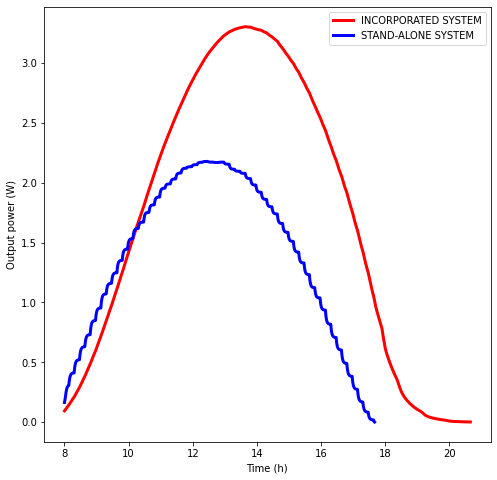

In [24]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Time"], target_file1["Output_power"], linewidth = 3, color = "r", label = "INCORPORATED SYSTEM")
axes.plot(file2["Time"], target_file2["Output_power"], linewidth = 3, color = "b", label = "STAND-ALONE SYSTEM")
plt.xlabel("Time (h)")
plt.ylabel("Output power (W)")
plt.legend()
plt.savefig("diagram1.jpg", dpi = 400)

The above plot shows that output power (W) increases with time (h) for a while, and then declines, for both incorporated and Stand-alone systems.

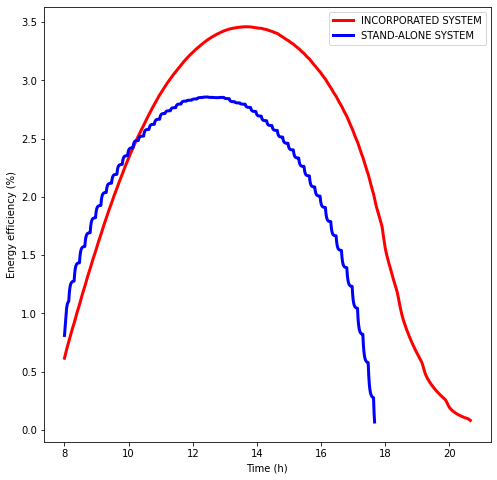

In [25]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Time"], target_file1["Energy_efficiency"], linewidth = 3, color = "r", label = "INCORPORATED SYSTEM")
axes.plot(file2["Time"], target_file2["Energy_efficiency"], linewidth = 3, color = "b", label = "STAND-ALONE SYSTEM")
plt.xlabel("Time (h)")
plt.ylabel("Energy efficiency (%)")
plt.legend()
plt.savefig("diagram2.jpg", dpi = 400)

The above plot shows that Energy efficiency (%) for both systems increases with time (h) for a while, and then declines sharply.

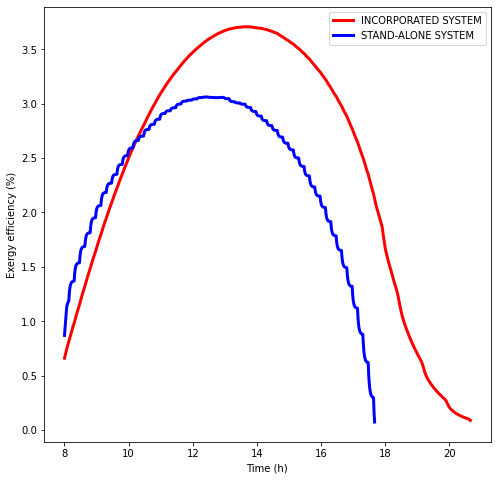

In [26]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Time"], target_file1["Exergy_efficiency"], linewidth = 3, color = "r", label = "INCORPORATED SYSTEM")
axes.plot(file2["Time"], target_file2["Exergy_efficiency"], linewidth = 3, color = "b", label = "STAND-ALONE SYSTEM")
plt.xlabel("Time (h)")
plt.ylabel("Exergy efficiency (%)")
plt.legend()
plt.savefig("diagram3.jpg", dpi = 400)

The above plot shows that Exergy efficiency (%) for both systems increases with time (h) for a while, and then declines sharply.

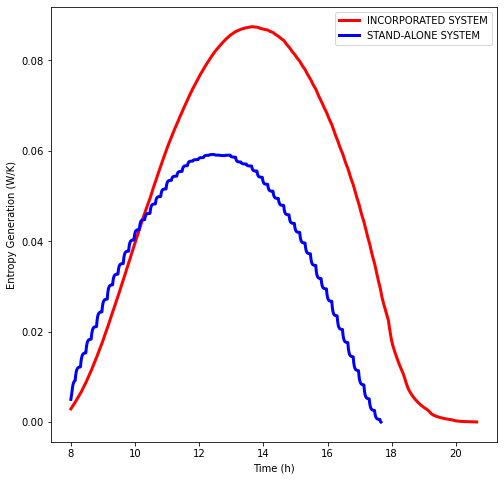

In [27]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Time"], target_file1["Entropy_Generation"], linewidth = 3, color = "r", label = "INCORPORATED SYSTEM")
axes.plot(file2["Time"], target_file2["Entropy_Generation"], linewidth = 3, color = "b", label = "STAND-ALONE SYSTEM")
plt.xlabel("Time (h)")
plt.ylabel("Entropy Generation (W/K)")
plt.legend()
plt.savefig("diagram4.jpg", dpi = 400)

The above plot shows that Entropy Generation (W/K) for both systems increases with time (h) for a while, and then declines sharply.

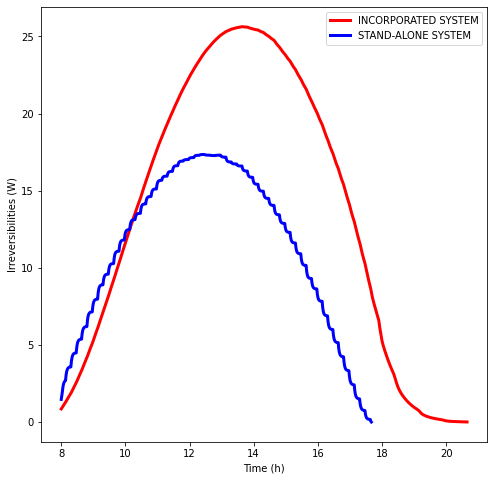

In [28]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Time"], target_file1["Irreversibilities"], linewidth = 3, color = "r", label = "INCORPORATED SYSTEM")
axes.plot(file2["Time"], target_file2["Irreversibilities"], linewidth = 3, color = "b", label = "STAND-ALONE SYSTEM")
plt.xlabel("Time (h)")
plt.ylabel("Irreversibilities (W)")
plt.legend()
plt.savefig("diagram5.jpg", dpi = 400)

The above plot shows that Irreversibilities (W) for both systems increases with time (h) for a while, and then declines sharply.

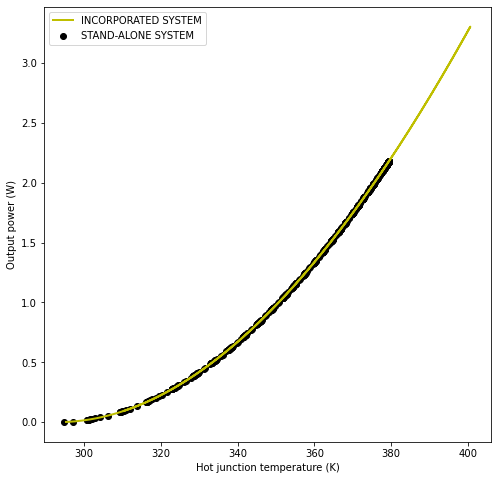

In [29]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Hot_junction_temperature"], target_file1["Output_power"], linewidth= 2, color = "y", label = "INCORPORATED SYSTEM")
axes.scatter(file2["Hot_junction_temperature"], target_file2["Output_power"], color ="k", label = "STAND-ALONE SYSTEM")
plt.xlabel("Hot junction temperature (K)")
plt.ylabel("Output power (W)")
plt.legend()
plt.savefig("diagram6.jpg", dpi = 400)

It can be seen from the above plot that Output power (W) increases with Hot junction temperature (K) for both systems.

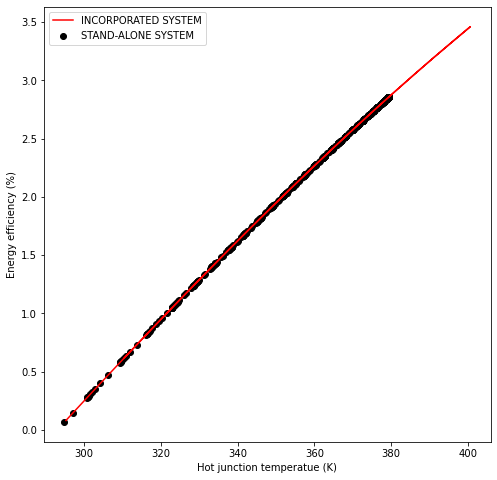

In [30]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Hot_junction_temperature"], target_file1["Energy_efficiency"], color = "r", label = "INCORPORATED SYSTEM")
axes.scatter(file2["Hot_junction_temperature"], target_file2["Energy_efficiency"], color = "k", label = "STAND-ALONE SYSTEM")
plt.xlabel("Hot junction temperatue (K)")
plt.ylabel("Energy efficiency (%)")
plt.legend()
plt.savefig("diagram7.jpg", dpi = 400)

It can be seen from the above plot that Energy efficiency (%) increases with Hot junction temperature (K) for both systems. Hence both quantities are highly correlated.

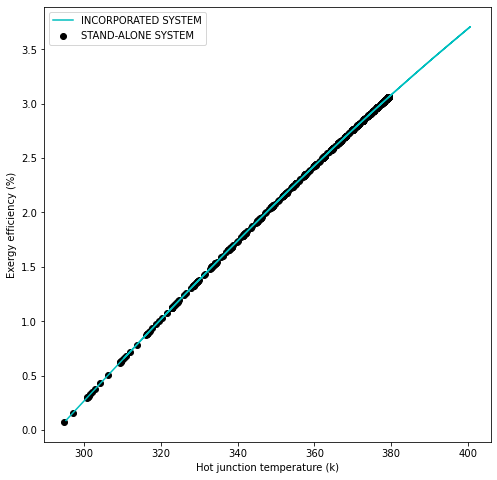

In [31]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Hot_junction_temperature"], target_file1["Exergy_efficiency"], color = "c", label = "INCORPORATED SYSTEM")
axes.scatter(file2["Hot_junction_temperature"], target_file2["Exergy_efficiency"],  color = "k", label = "STAND-ALONE SYSTEM")
plt.xlabel("Hot junction temperature (k)")
plt.ylabel("Exergy efficiency (%)")
plt.legend()
plt.savefig("diagram8.jpg", dpi = 400)

It can be seen from the above plot that Exergy efficiency (%) increases with Hot junction temperature (K) for both systems. Hence both quantities are highly correlated.

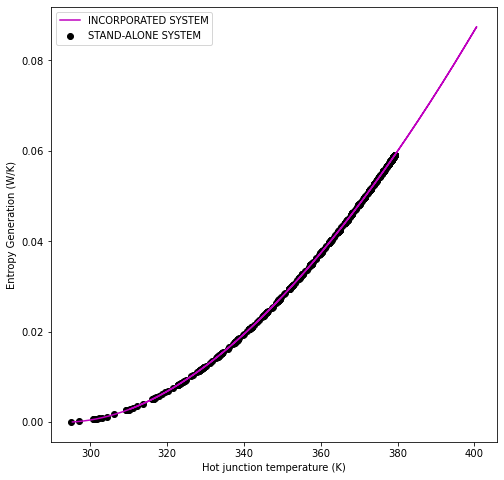

In [32]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Hot_junction_temperature"], target_file1["Entropy_Generation"], color = "m", label = "INCORPORATED SYSTEM")
axes.scatter(file2["Hot_junction_temperature"], target_file2["Entropy_Generation"],  color = "k", label = "STAND-ALONE SYSTEM")
plt.xlabel("Hot junction temperature (K)")
plt.ylabel("Entropy Generation (W/K)")
plt.legend()
plt.savefig("diagram9.jpg", dpi = 400)

It can be seen from the above plot that Entropy Generation (W/K) increases with Hot junction temperature (K) for both systems. 

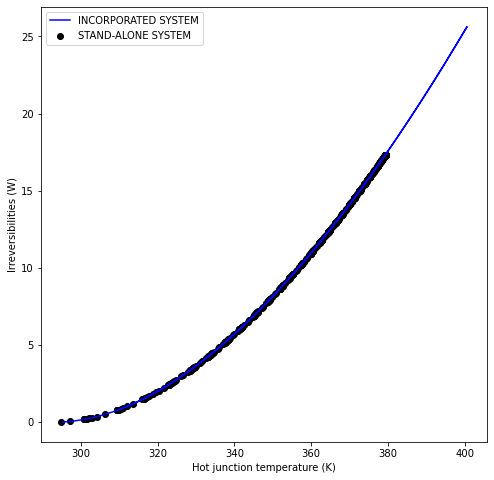

In [33]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(file1["Hot_junction_temperature"], target_file1["Irreversibilities"], color = "b", label = "INCORPORATED SYSTEM")
axes.scatter(file2["Hot_junction_temperature"], target_file2["Irreversibilities"], color = "k", label = "STAND-ALONE SYSTEM")
plt.xlabel("Hot junction temperature (K)")
plt.ylabel("Irreversibilities (W)")
plt.legend()
plt.savefig("diagram10.jpg", dpi = 400)

It can be seen from the above plot that Irreversibilities (W) increases with Hot junction temperature (K) for both systems. 

# Model Building

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
ss = StandardScaler()

In [36]:
file1 = ss.fit_transform(file1)

In [37]:
file2 =  ss.fit_transform(file2)

Before making the decision on which model to use, Cross validation score would be used to analyze different regressive model performance.
And in this analysis, XGBoost regressor, Random forest regressor, and Decision tree regressor would be the test algorithms.

In [38]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold, cross_val_score
xgb1 = XGBRegressor()
lr = LinearRegression()
RFr = RandomForestRegressor(n_estimators = 100, random_state = 0)
dtr = DecisionTreeRegressor(random_state = 0)

In [39]:
def r2_cross_val_score(model, i, file, target_file):
    cv = RepeatedKFold(n_splits = 10, n_repeats = 2, random_state = 1)
    scores = cross_val_score(model, file, target_file, cv = cv, scoring = "r2")
    return scores.mean()

In [40]:
def rmse_cross_val_score(model, i, file, target_file):
    cv = RepeatedKFold(n_splits = 10, n_repeats = 2, random_state = 1)
    scores = cross_val_score(model, file, target_file, cv = cv, scoring = "neg_mean_squared_error")
    return  math.sqrt(np.abs(scores).mean())

# Incorporated system

(i) R2_score as metric

In [41]:

#Xgboost Regressor

scores_ = []
for i in outputs:
    mean_scores = r2_cross_val_score(xgb1, i, file1, target_file1[i].values)
    scores_.append(mean_scores)
    print("'{}' r2_score is: {}".format(i, mean_scores))
df1 = pd.DataFrame({"Outputs": outputs_, "R2 Score" : scores_})
df1 = df1.set_index('Outputs')

'Output_power' r2_score is: 0.9999521346743976
'Energy_efficiency' r2_score is: 0.999939801390242
'Exergy_efficiency' r2_score is: 0.9999388406459927
'Entropy_Generation' r2_score is: 0.999668596699248
'Irreversibilities' r2_score is: 0.9999461221958368


In [42]:
#Linear regression

scores_ = []
for i in outputs:
    mean_scores = r2_cross_val_score(lr, i, file1, target_file1[i].values)
    scores_.append(mean_scores)
    print("'{}' r2_score is: {}".format(i, mean_scores))
df2 = pd.DataFrame({"Outputs": outputs_, "R2 score" : scores_})
df2 = df2.set_index('Outputs')

'Output_power' r2_score is: 0.9651593263501427
'Energy_efficiency' r2_score is: 0.9989805928318087
'Exergy_efficiency' r2_score is: 0.9989803888490567
'Entropy_Generation' r2_score is: 0.9721264973442052
'Irreversibilities' r2_score is: 0.9721096785267236


In [43]:
#Random Forest Regressor

scores_ = []
for i in outputs:
    mean_scores = r2_cross_val_score(RFr, i, file1, target_file1[i].values)
    scores_.append(mean_scores)
    print("'{}' r2_score is: {}".format(i, mean_scores))
df3 = pd.DataFrame({"Outputs": outputs_, "R2 Score" : scores_})
df3 = df3.set_index('Outputs')

'Output_power' r2_score is: 0.9999944033608272
'Energy_efficiency' r2_score is: 0.9999927976484511
'Exergy_efficiency' r2_score is: 0.999992788412092
'Entropy_Generation' r2_score is: 0.999994595606547
'Irreversibilities' r2_score is: 0.9999943416645038


In [44]:
#Decision Tree Regressor

scores_ = []
for i in outputs:
    mean_scores = r2_cross_val_score(dtr, i, file1, target_file1[i].values)
    scores_.append(mean_scores)
    print("'{}' r2_score is: {}".format(i, mean_scores))
df4 = pd.DataFrame({"Outputs": outputs_, "R2 score" : scores_})
df4 = df4.set_index('Outputs')

'Output_power' r2_score is: 0.9999742549509218
'Energy_efficiency' r2_score is: 0.9999702526972735
'Exergy_efficiency' r2_score is: 0.9999698747466205
'Entropy_Generation' r2_score is: 0.9999774990284042
'Irreversibilities' r2_score is: 0.9999772328837035


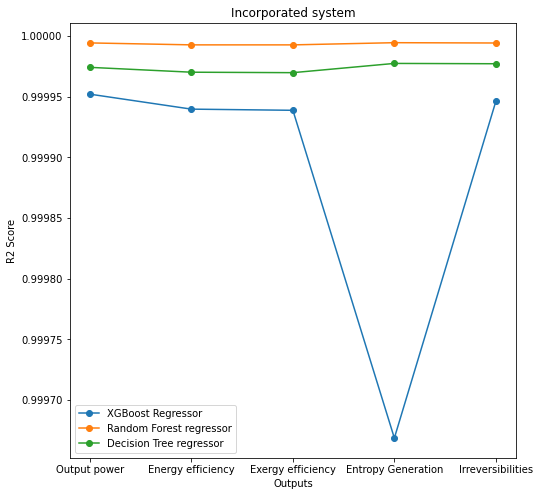

In [45]:
fig = plt.figure(figsize = (8,8))
axes = fig.add_subplot(1,1,1)
axes.plot(df1, marker = "o", label = "XGBoost Regressor")
axes.plot(df3, marker = "o", label = "Random Forest regressor")
axes.plot(df4, marker = "o", label = "Decision Tree regressor")
plt.xlabel("Outputs")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Incorporated system")
plt.savefig("diagram11.jpg", dpi = 400)

It can be seen from the above plot that Random Forest Regressor model has the highest R2 score for all ouput variables.

(ii) Root mean Squared error as metric 

In [46]:
import math
#Xgboost Regressor
scores_ = []
for i in outputs:
    mean_score = rmse_cross_val_score(xgb1, i, file1, target_file1[i].values)
    scores_.append(mean_score)
    print("'{}' RMSE score is: {}".format(i, mean_score))
df1 = pd.DataFrame({"Outputs": outputs_, "Rmse score" : scores_})
df1 = df1.set_index('Outputs')

'Output_power' RMSE score is: 0.008243764712251541
'Energy_efficiency' RMSE score is: 0.008483670635369122
'Exergy_efficiency' RMSE score is: 0.009179406631729047
'Entropy_Generation' RMSE score is: 0.0005723347368500415
'Irreversibilities' RMSE score is: 0.06771909561210754


In [47]:
#Linear regression

scores_ = []
for i in outputs:
    mean_score = rmse_cross_val_score(lr, i, file1, target_file1[i].values)
    scores_.append(mean_score)
    print("'{}' RMSE score is: {}".format(i, mean_score))
df2 = pd.DataFrame({"Outputs": outputs_, "Rmse score" : scores_})
df2 = df2.set_index('Outputs')

'Output_power' RMSE score is: 0.2234587464681811
'Energy_efficiency' RMSE score is: 0.035127752573965165
'Exergy_efficiency' RMSE score is: 0.03764560879542932
'Entropy_Generation' RMSE score is: 0.005268169147587486
'Irreversibilities' RMSE score is: 1.544032514169917


In [48]:
#Random Forest Regressor

scores_ = []
for i in outputs:
    mean_score = rmse_cross_val_score(RFr, i, file1, target_file1[i].values)
    scores_.append(mean_score)
    print("'{}' RMSE score is: {}".format(i, mean_score))
df3 = pd.DataFrame({"Outputs": outputs_, "Rmse score" : scores_})
df3 = df3.set_index('Outputs')

'Output_power' RMSE score is: 0.002822255319542855
'Energy_efficiency' RMSE score is: 0.0029580522450714506
'Exergy_efficiency' RMSE score is: 0.003167504215273733
'Entropy_Generation' RMSE score is: 7.306044562718409e-05
'Irreversibilities' RMSE score is: 0.02190786350574107


In [49]:
#Decision Tree Regressor

scores_ = []
for i in outputs:
    mean_score = rmse_cross_val_score(dtr, i, file1, target_file1[i].values)
    scores_.append(mean_score)
    print("'{}' RMSE score is: {}".format(i, mean_score))
df4 = pd.DataFrame({"Outputs": outputs_, "Rmse score" : scores_})
df4 = df4.set_index('Outputs')

'Output_power' RMSE score is: 0.00605415424263418
'Energy_efficiency' RMSE score is: 0.00598782287382157
'Exergy_efficiency' RMSE score is: 0.0064350174904247
'Entropy_Generation' RMSE score is: 0.00014912979055985696
'Irreversibilities' RMSE score is: 0.043915797031975276


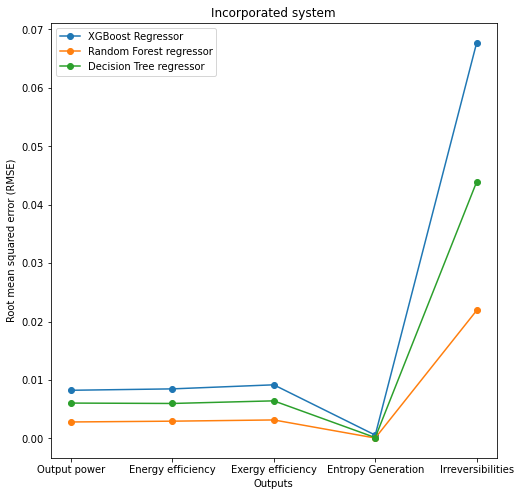

In [50]:
fig = plt.figure(figsize = (8,8))
axes = fig.add_subplot(1,1,1)
axes.plot(df1, marker = "o", label = "XGBoost Regressor")
axes.plot(df3, marker = "o", label = "Random Forest regressor")
axes.plot(df4, marker = "o", label = "Decision Tree regressor")
plt.xlabel("Outputs")
plt.ylabel("Root mean squared error (RMSE)")
plt.legend()
plt.title("Incorporated system")
plt.savefig("diagram12.jpg", dpi = 400)

From the plot above, Random Forest regressor has the least Root mean Squared error, and that makes it the best algorithm to be used.

# Stand-Alone System

(i) R2_score as metric

In [51]:

#Xgboost Regressor

scores_ = []
for i in outputs:
    mean_scores = r2_cross_val_score(xgb1, i, file2, target_file2[i].values)
    scores_.append(mean_scores)
    print("'{}' r2_score is: {}".format(i, mean_scores))
df1 = pd.DataFrame({"Outputs": outputs_, "R2 Score" : scores_})
df1 = df1.set_index('Outputs')

'Output_power' r2_score is: 0.999861308080129
'Energy_efficiency' r2_score is: 0.9994870835036759
'Exergy_efficiency' r2_score is: 0.9994805249697036
'Entropy_Generation' r2_score is: 0.9992921821365393
'Irreversibilities' r2_score is: 0.9998358943817376


In [52]:
#Linear regression

scores_ = []
for i in outputs:
    mean_scores = r2_cross_val_score(lr, i, file2, target_file2[i].values)
    scores_.append(mean_scores)
    print("'{}' r2_score is: {}".format(i, mean_scores))
df2 = pd.DataFrame({"Outputs": outputs_, "R2 Score" : scores_})
df2 = df2.set_index('Outputs')

'Output_power' r2_score is: 0.9680335260890962
'Energy_efficiency' r2_score is: 0.999310097726922
'Exergy_efficiency' r2_score is: 0.9993101308128521
'Entropy_Generation' r2_score is: 0.9744166451622466
'Irreversibilities' r2_score is: 0.9743930457319122


In [53]:
#Random Forest Regressor

scores_ = []
for i in outputs:
    mean_scores = r2_cross_val_score(RFr, i, file2, target_file2[i].values)
    scores_.append(mean_scores)
    print("'{}' r2_score is: {}".format(i, mean_scores))
df3 = pd.DataFrame({"Outputs": outputs_, "R2 Score" : scores_})
df3 = df3.set_index('Outputs')

'Output_power' r2_score is: 0.9999603737695285
'Energy_efficiency' r2_score is: 0.9998698483401418
'Exergy_efficiency' r2_score is: 0.9998661787310745
'Entropy_Generation' r2_score is: 0.9999582716666652
'Irreversibilities' r2_score is: 0.9999558573002908


In [54]:
#Decision Tree Regressor

scores_ = []
for i in outputs:
    mean_scores = r2_cross_val_score(dtr, i, file2, target_file2[i].values)
    scores_.append(mean_scores)
    print("'{}' r2_score is: {}".format(i, mean_scores))
df4 = pd.DataFrame({"Outputs": outputs_, "R2 Score" : scores_})
df4 = df4.set_index('Outputs')

'Output_power' r2_score is: 0.9999152415343774
'Energy_efficiency' r2_score is: 0.9997626501620859
'Exergy_efficiency' r2_score is: 0.9997575289140459
'Entropy_Generation' r2_score is: 0.999904084470411
'Irreversibilities' r2_score is: 0.99990263174313


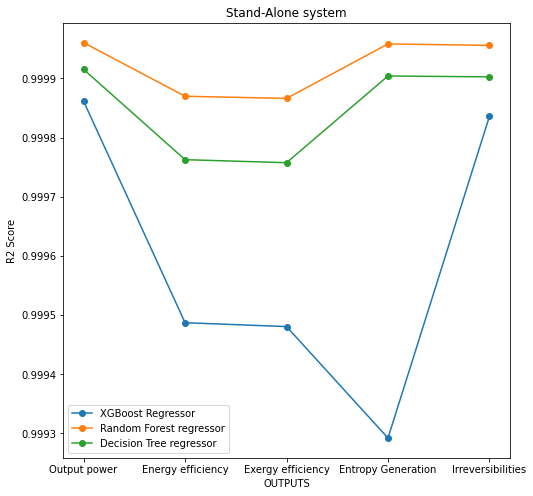

In [55]:
fig = plt.figure(figsize = (8,8))
axes = fig.add_subplot(1,1,1)
axes.plot(df1, marker = "o", label = "XGBoost Regressor")
axes.plot(df3, marker = "o", label = "Random Forest regressor")
axes.plot(df4, marker = "o", label = "Decision Tree regressor")
plt.xlabel("OUTPUTS")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Stand-Alone system")
plt.savefig("diagram13.jpg", dpi = 400)

It can be seen from the above plot that Random Forest Regressor model has the highest R2 score for all ouput variables.

(ii) Root mean Squared error as metric 

In [56]:

#Xgboost Regressor

scores_ = []
for i in outputs:
    mean_score = rmse_cross_val_score(xgb1, i, file2, target_file2[i].values)
    scores_.append(mean_score)
    print("'{}' RMSE score is: {}".format(i, mean_score))
df1 = pd.DataFrame({"Outputs": outputs_, "Rmse score" : scores_})
df1 = df1.set_index('Outputs')

'Output_power' RMSE score is: 0.007689393103780195
'Energy_efficiency' RMSE score is: 0.014723222048212163
'Exergy_efficiency' RMSE score is: 0.015835770892519262
'Entropy_Generation' RMSE score is: 0.0004644497482175123
'Irreversibilities' RMSE score is: 0.06572584018783603


In [57]:
#Linear regression

scores_ = []
for i in outputs:
    mean_score = rmse_cross_val_score(lr, i, file2, target_file2[i].values)
    scores_.append(mean_score)
    print("'{}' RMSE score is: {}".format(i, mean_score))
df2 = pd.DataFrame({"Outputs": outputs_, "Rmse score" : scores_})
df2 = df2.set_index('Outputs')

'Output_power' RMSE score is: 0.11734539628116744
'Energy_efficiency' RMSE score is: 0.0169795095672606
'Exergy_efficiency' RMSE score is: 0.018193815137471567
'Entropy_Generation' RMSE score is: 0.002809475889124785
'Irreversibilities' RMSE score is: 0.823577789237444


In [58]:
#Random Forest Regressor

scores_ = []
for i in outputs:
    mean_score = rmse_cross_val_score(RFr, i, file2, target_file2[i].values)
    scores_.append(mean_score)
    print("'{}' RMSE score is: {}".format(i, mean_score))
df3 = pd.DataFrame({"Outputs": outputs_, "Rmse score" : scores_})
df3 = df3.set_index('Outputs')

'Output_power' RMSE score is: 0.00411417473929918
'Energy_efficiency' RMSE score is: 0.007342042087629517
'Exergy_efficiency' RMSE score is: 0.007999951718106621
'Entropy_Generation' RMSE score is: 0.00011297693296996151
'Irreversibilities' RMSE score is: 0.03408279537898867


In [59]:
#Decision Tree Regressor

scores_ = []
for i in outputs:
    mean_score = rmse_cross_val_score(dtr, i, file2, target_file2[i].values)
    scores_.append(mean_score)
    print("'{}' RMSE score is: {}".format(i, mean_score))
df4 = pd.DataFrame({"Outputs": outputs_, "Rmse score" : scores_})
df4 = df4.set_index('Outputs')

'Output_power' RMSE score is: 0.0060430269824489746
'Energy_efficiency' RMSE score is: 0.010171536728137656
'Exergy_efficiency' RMSE score is: 0.011027234453342777
'Entropy_Generation' RMSE score is: 0.00017042416594868854
'Irreversibilities' RMSE score is: 0.050231058055017694


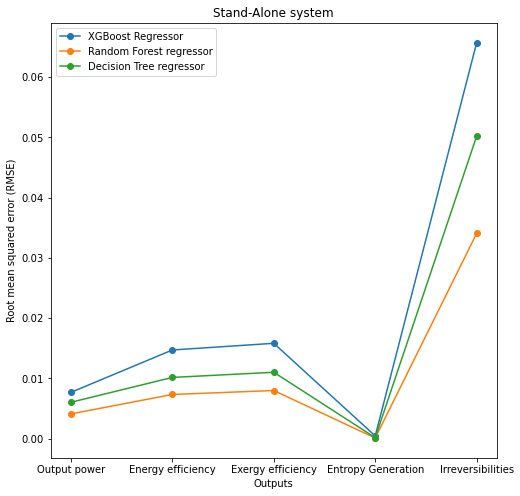

In [60]:
fig = plt.figure(figsize = (8,8))
axes = fig.add_subplot(1,1,1)
axes.plot(df1, marker = "o", label = "XGBoost Regressor")
axes.plot(df3, marker = "o", label = "Random Forest regressor")
axes.plot(df4, marker = "o", label = "Decision Tree regressor")
plt.xlabel("Outputs")
plt.ylabel("Root mean squared error (RMSE)")
plt.legend()
plt.title("Stand-Alone system")
plt.savefig("diagram14.jpg", dpi = 400)

From the plot above, Random Forest regressor has the least Root mean Squared error, and that makes it the best algorithm to be used.

In [61]:
xtrain1, xtest1, y_train1, y_test1 = train_test_split(file1, target_file1, test_size = 0.3, random_state = 0)

In [62]:
xtrain2, xtest2, y_train2, y_test2 = train_test_split(file2, target_file2, test_size = 0.3, random_state = 0)

# Predicted vs Actual value

(i) Output Power

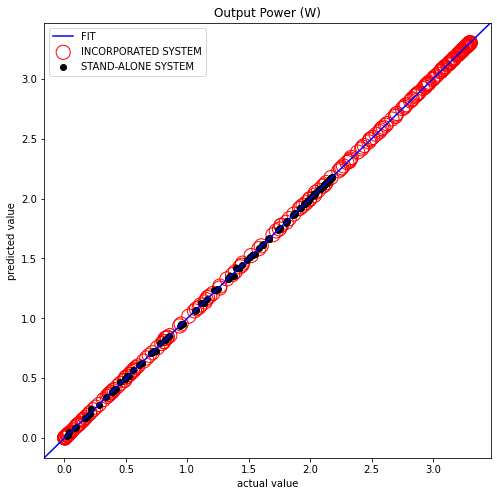

In [63]:
from sklearn.metrics import r2_score, mean_squared_error

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain1, y_train1["Output_power"])
predicted_optest_1 = rf.predict(xtest1)

axes.scatter(y_test1["Output_power"], predicted_optest_1, edgecolor = "r", facecolor = "none", s=200 ,label = "INCORPORATED SYSTEM")


rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain2, y_train2["Output_power"])
predicted_optest_2 = rf.predict(xtest2)
    
axes.scatter(y_test2["Output_power"], predicted_optest_2, color = "k", label = "STAND-ALONE SYSTEM")
plt.axline((0,0), slope=1, label = "FIT", color = "b")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.legend()
plt.title("Output Power (W)")
plt.savefig("diagram15.jpg", dpi = 400)

(ii) Energy Efficiency

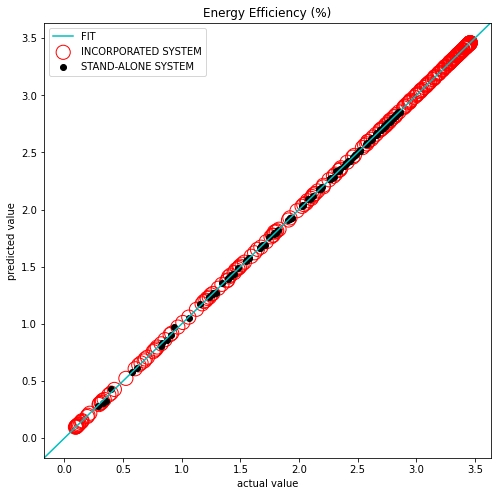

In [66]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

#For Incorporated system


rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain1, y_train1["Energy_efficiency"])
predicted_etest_1 = rf.predict(xtest1)

axes.scatter(y_test1["Energy_efficiency"], predicted_etest_1, edgecolor = "r", facecolor = "none", s=200 ,label = "INCORPORATED SYSTEM")


#for Stand-alone system

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain2, y_train2["Energy_efficiency"])
predicted_etest_2 = rf.predict(xtest2)


axes.scatter(y_test2["Energy_efficiency"], predicted_etest_2, color = "k", label = "STAND-ALONE SYSTEM")
plt.axline((0,0), slope=1, label = "FIT", color = "c")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.legend()
plt.title("Energy Efficiency (%)")
plt.savefig("diagram16.jpg", dpi = 400)

(iii) Exergy Efficiency

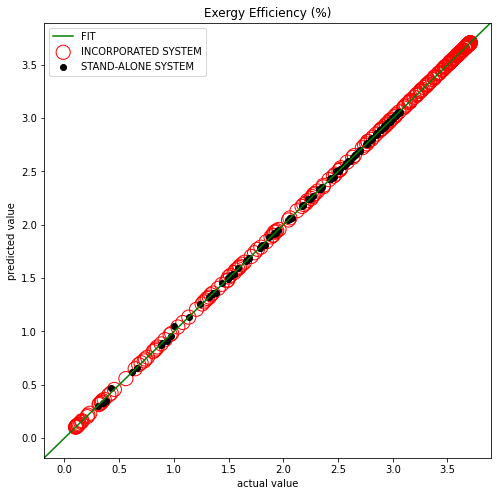

In [67]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

#For Incorporated system


rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain1, y_train1["Exergy_efficiency"])
predicted_extest_1 = rf.predict(xtest1)

axes.scatter(y_test1["Exergy_efficiency"], predicted_extest_1, edgecolor = "r", facecolor = "none", s=200 ,label = "INCORPORATED SYSTEM")


#for Stand-alone system

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain2, y_train2["Exergy_efficiency"])
predicted_extest_2 = rf.predict(xtest2)


axes.scatter(y_test2["Exergy_efficiency"], predicted_extest_2, color = "k", label = "STAND-ALONE SYSTEM")
plt.axline((0,0), slope=1, label = "FIT", color = "g")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.legend()
plt.title("Exergy Efficiency (%)")
plt.savefig("diagram17.jpg", dpi = 400)

(iv) Entropy Generation

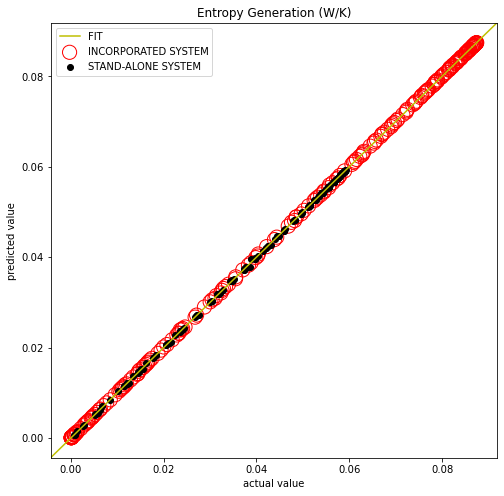

In [68]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

#For Incorporated system


rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain1, y_train1["Entropy_Generation"])
predicted_entest_1 = rf.predict(xtest1)

axes.scatter(y_test1["Entropy_Generation"], predicted_entest_1, edgecolor = "r", facecolor = "none", s=200 ,label = "INCORPORATED SYSTEM")


#for Stand-alone system

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain2, y_train2["Entropy_Generation"])
predicted_entest_2 = rf.predict(xtest2)


axes.scatter(y_test2["Entropy_Generation"], predicted_entest_2, color = "k", label = "STAND-ALONE SYSTEM")
plt.axline((0,0), slope=1, label = "FIT", color = "y")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.legend()
plt.title("Entropy Generation (W/K)")
plt.savefig("diagram18.jpg", dpi = 400)

(v) Irreversibilities

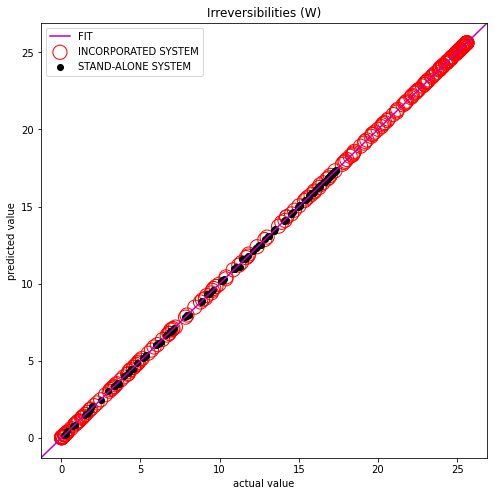

In [69]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

#For Incorporated system


rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain1, y_train1["Irreversibilities"])
predicted_itest_1 = rf.predict(xtest1)

axes.scatter(y_test1["Irreversibilities"], predicted_itest_1, edgecolor = "r", facecolor = "none", s=200 ,label = "INCORPORATED SYSTEM")


#for Stand-alone system

rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(xtrain2, y_train2["Irreversibilities"])
predicted_itest_2 = rf.predict(xtest2)


axes.scatter(y_test2["Irreversibilities"], predicted_itest_2, color = "k", label = "STAND-ALONE SYSTEM")
plt.axline((0,0), slope=1, label = "FIT", color = "m")
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.legend()
plt.title("Irreversibilities (W)")
plt.savefig("diagram19.jpg", dpi = 400)

In [70]:
test1__ = pd.DataFrame({"predicted_output_power":predicted_optest_1, "predicted_energy_efficiency": predicted_etest_1,"predicted_exergy_efficiency" : predicted_extest_1,"predicted_entropy_generation": predicted_entest_1, "predicted_irreversibilities" : predicted_itest_1} )
test1__.index = y_test1.index

In [71]:
incorp_test = pd.concat([test1__, y_test1], axis = 1, )
test_data1 = pd.merge(file1_, incorp_test, left_index = True, right_index = True)

In [72]:
test2__ = pd.DataFrame({"predicted_output_power":predicted_optest_2, "predicted_energy_efficiency": predicted_etest_2,"predicted_exergy_efficiency" : predicted_extest_2,"predicted_entropy_generation": predicted_entest_2, "predicted_irreversibilities" : predicted_itest_2} )
test2__.index = y_test2.index

In [73]:
standalone_test = pd.concat([test2__, y_test2], axis = 1, )
test_data2 = pd.merge(file2_, standalone_test, left_index = True, right_index = True)

(i) Output Power

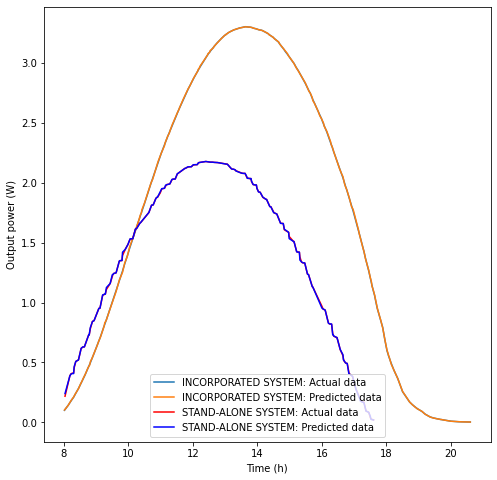

In [74]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(test_data1["Time"], test_data1["Output_power"], label = "INCORPORATED SYSTEM: Actual data")
axes.plot(test_data1["Time"], test_data1["predicted_output_power"], label = "INCORPORATED SYSTEM: Predicted data")
axes.plot(test_data2["Time"], test_data2["Output_power"], color = "r", label = "STAND-ALONE SYSTEM: Actual data")
axes.plot(test_data2["Time"], test_data2["predicted_output_power"], color = 'b', label = "STAND-ALONE SYSTEM: Predicted data")
plt.xlabel("Time (h)")
plt.ylabel("Output power (W)")
plt.legend()
plt.savefig("diagram20.jpg", dpi = 400)

(ii) Energy Efficiency

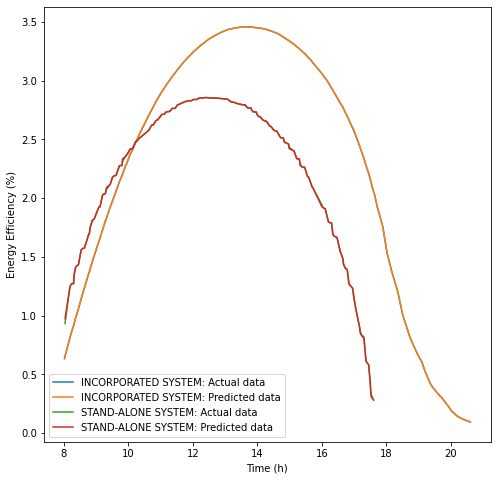

In [75]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(test_data1["Time"], test_data1["Energy_efficiency"], label = "INCORPORATED SYSTEM: Actual data")
axes.plot(test_data1["Time"], test_data1["predicted_energy_efficiency"], label = "INCORPORATED SYSTEM: Predicted data")
axes.plot(test_data2["Time"], test_data2["Energy_efficiency"], label = "STAND-ALONE SYSTEM: Actual data")
axes.plot(test_data2["Time"], test_data2["predicted_energy_efficiency"], label = "STAND-ALONE SYSTEM: Predicted data")
plt.xlabel("Time (h)")
plt.ylabel("Energy Efficiency (%)")
plt.legend()
plt.savefig("diagram21.jpg", dpi = 400)

(iii) Exergy Efficiency

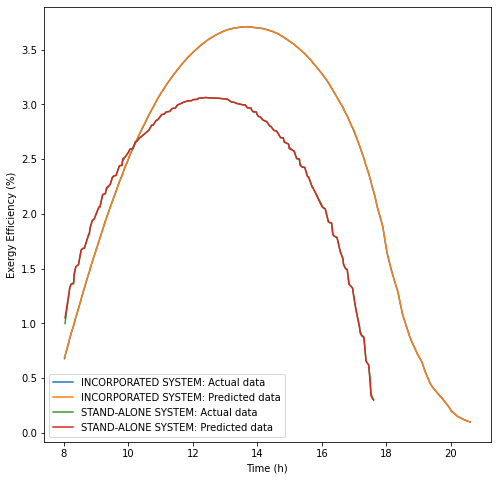

In [76]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(test_data1["Time"], test_data1["Exergy_efficiency"], label = "INCORPORATED SYSTEM: Actual data")
axes.plot(test_data1["Time"], test_data1["predicted_exergy_efficiency"], label = "INCORPORATED SYSTEM: Predicted data")
axes.plot(test_data2["Time"], test_data2["Exergy_efficiency"], label = "STAND-ALONE SYSTEM: Actual data")
axes.plot(test_data2["Time"], test_data2["predicted_exergy_efficiency"], label = "STAND-ALONE SYSTEM: Predicted data")
plt.xlabel("Time (h)")
plt.ylabel("Exergy Efficiency (%)")
plt.legend()
plt.savefig("diagram22.jpg", dpi = 400)

(iv) Entropy Generation

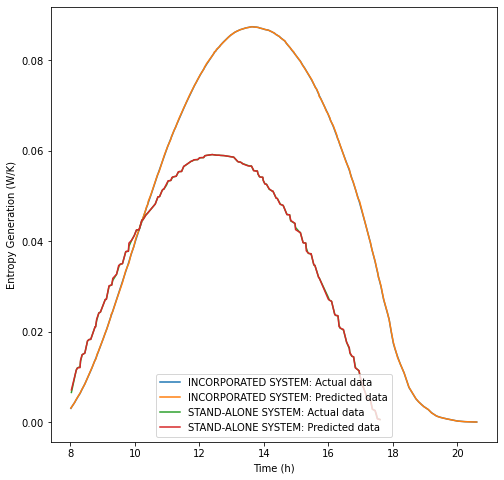

In [77]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(test_data1["Time"], test_data1["Entropy_Generation"], label = "INCORPORATED SYSTEM: Actual data")
axes.plot(test_data1["Time"], test_data1["predicted_entropy_generation"], label = "INCORPORATED SYSTEM: Predicted data")
axes.plot(test_data2["Time"], test_data2["Entropy_Generation"], label = "STAND-ALONE SYSTEM: Actual data")
axes.plot(test_data2["Time"], test_data2["predicted_entropy_generation"], label = "STAND-ALONE SYSTEM: Predicted data")
plt.xlabel("Time (h)")
plt.ylabel("Entropy Generation (W/K)")
plt.legend()
plt.savefig("diagram23.jpg", dpi = 400)

(v) Irreversibilities

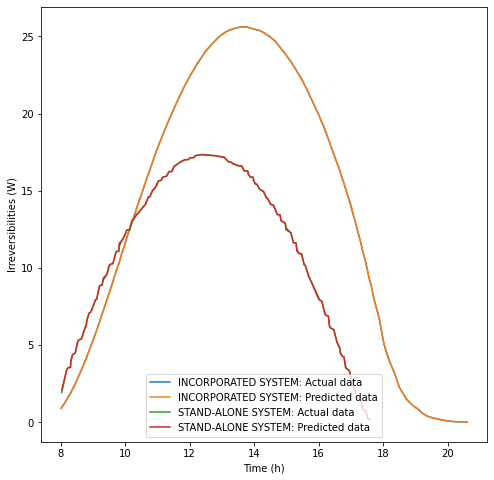

In [78]:
fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)
axes.plot(test_data1["Time"], test_data1["Irreversibilities"], label = "INCORPORATED SYSTEM: Actual data")
axes.plot(test_data1["Time"], test_data1["predicted_irreversibilities"], label = "INCORPORATED SYSTEM: Predicted data")
axes.plot(test_data2["Time"], test_data2["Irreversibilities"], label = "STAND-ALONE SYSTEM: Actual data")
axes.plot(test_data2["Time"], test_data2["predicted_irreversibilities"], label = "STAND-ALONE SYSTEM: Predicted data")
plt.xlabel("Time (h)")
plt.ylabel("Irreversibilities (W)")
plt.legend()
plt.savefig("diagram24.jpg", dpi = 400)

# Learning Rate Curves- R2 Score

A plot of learning curves shows a good fit if the plot of training loss and validation/test loss decreases to a point of stability with a small gap between them.

For our model(Random Forest Regressor), the "number of estimators" parameter would be used to analyze the model's performance by plotting it against two metrics: Rmse, and R2 score.

(i) Output power

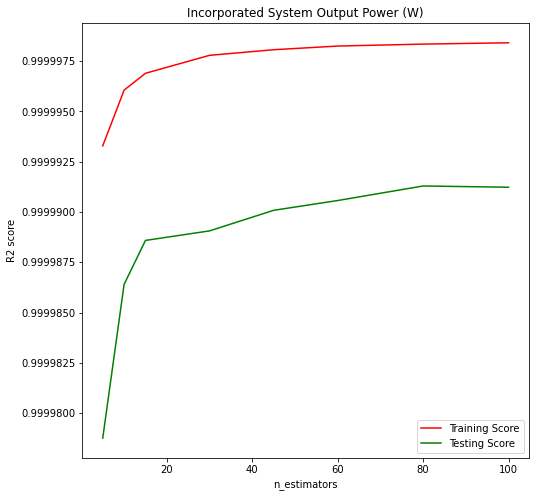

In [79]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Output_power"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(r2_score(y_train1["Output_power"], rf.predict(xtrain1)))
    testresults.append(r2_score(y_test1["Output_power"], ypredicted1))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
axes.ticklabel_format(useOffset=False)
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Incorporated System Output Power (W)")
plt.legend()
plt.savefig("diagram25.jpg", dpi = 400)

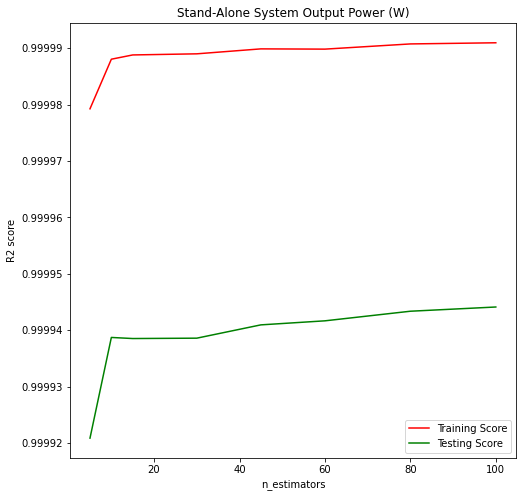

In [80]:
#for Stand-alone system
trainresults1= []
testresults1 = []
for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Output_power"])
    ypredicted2 = rf.predict(xtest2)
    trainresults1.append(r2_score(y_train2["Output_power"], rf.predict(xtrain2)))
    testresults1.append(r2_score(y_test2["Output_power"], ypredicted2))

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults1, color="r", label="Training Score")
axes.plot(trees, testresults1, color="g", label="Testing Score")
axes.ticklabel_format(useOffset=False)
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Stand-Alone System Output Power (W)")
plt.legend()
plt.savefig("diagram26.jpg", dpi = 400)

(ii) Energy Efficiency

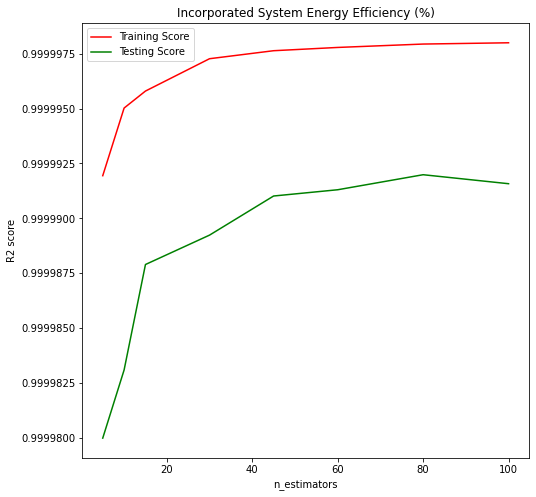

In [81]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Energy_efficiency"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(r2_score(y_train1["Energy_efficiency"], rf.predict(xtrain1)))
    testresults.append(r2_score(y_test1["Energy_efficiency"], ypredicted1))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
axes.ticklabel_format(useOffset=False)
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Incorporated System Energy Efficiency (%)")
plt.legend()
plt.savefig("diagram27.jpg", dpi = 400)

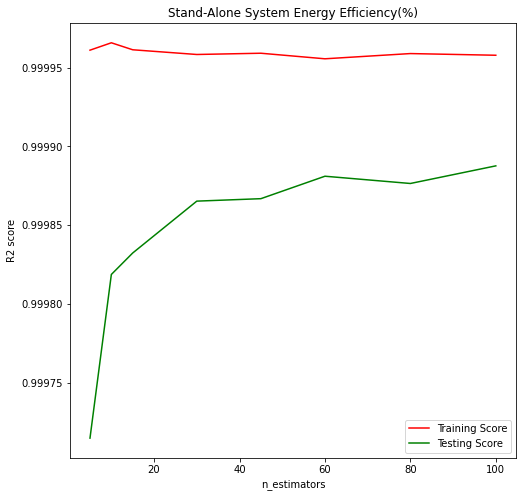

In [82]:
#for Stand-alone system
trainresults1= []
testresults1 = []
for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Energy_efficiency"])
    ypredicted2 = rf.predict(xtest2)
    trainresults1.append(r2_score(y_train2["Energy_efficiency"], rf.predict(xtrain2)))
    testresults1.append(r2_score(y_test2["Energy_efficiency"], ypredicted2))

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults1, color="r", label="Training Score")
axes.plot(trees, testresults1, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Stand-Alone System Energy Efficiency(%)")
plt.legend()
plt.savefig("diagram28.jpg", dpi = 400)

(iii) Exergy Efficiency

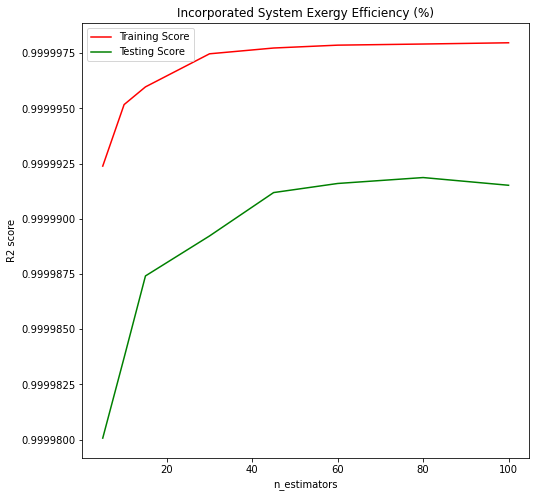

In [83]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Exergy_efficiency"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(r2_score(y_train1["Exergy_efficiency"], rf.predict(xtrain1)))
    testresults.append(r2_score(y_test1["Exergy_efficiency"], ypredicted1))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
axes.ticklabel_format(useOffset=False)
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Incorporated System Exergy Efficiency (%)")
plt.legend()
plt.savefig("diagram29.jpg", dpi = 400)

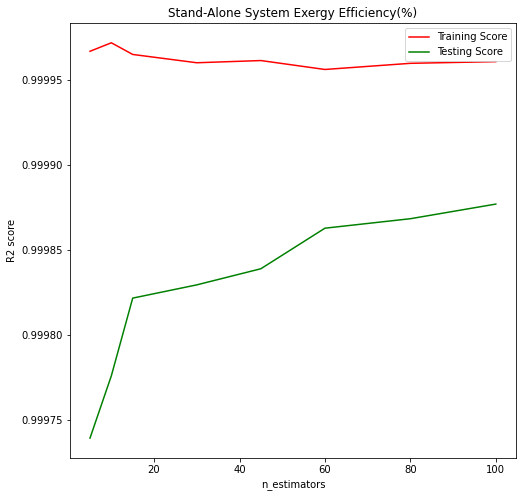

In [84]:
#Stand-alone system
trainresults1= []
testresults1 = []
for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Exergy_efficiency"])
    ypredicted2 = rf.predict(xtest2)
    trainresults1.append(r2_score(y_train2["Exergy_efficiency"], rf.predict(xtrain2)))
    testresults1.append(r2_score(y_test2["Exergy_efficiency"], ypredicted2))

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults1, color="r", label="Training Score")
axes.plot(trees, testresults1, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Stand-Alone System Exergy Efficiency(%)")
plt.legend()
plt.savefig("diagram30.jpg", dpi = 400)

(iv) Entropy Generation

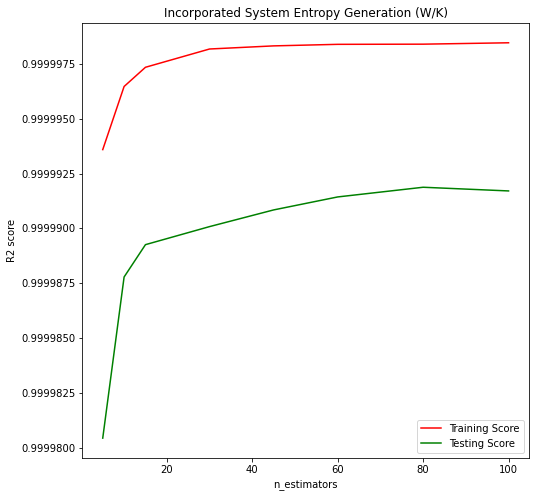

In [85]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Entropy_Generation"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(r2_score(y_train1["Entropy_Generation"], rf.predict(xtrain1)))
    testresults.append(r2_score(y_test1["Entropy_Generation"], ypredicted1))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
axes.ticklabel_format(useOffset=False)
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Incorporated System Entropy Generation (W/K)")
plt.legend()
plt.savefig("diagram31.jpg", dpi = 400)

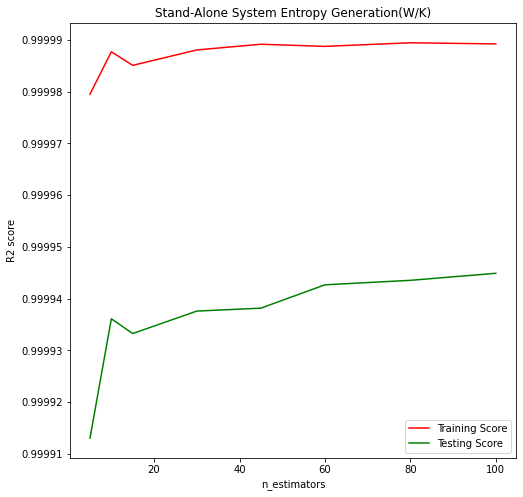

In [86]:
#Stand-alone system
trainresults1= []
testresults1 = []
for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Entropy_Generation"])
    ypredicted2 = rf.predict(xtest2)
    trainresults1.append(r2_score(y_train2["Entropy_Generation"], rf.predict(xtrain2)))
    testresults1.append(r2_score(y_test2["Entropy_Generation"], ypredicted2))

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults1, color="r", label="Training Score")
axes.plot(trees, testresults1, color="g", label="Testing Score")
axes.ticklabel_format(useOffset=False)
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Stand-Alone System Entropy Generation(W/K)")
plt.legend()
plt.savefig("diagram32.jpg", dpi = 400)

(v) Irreversibilities

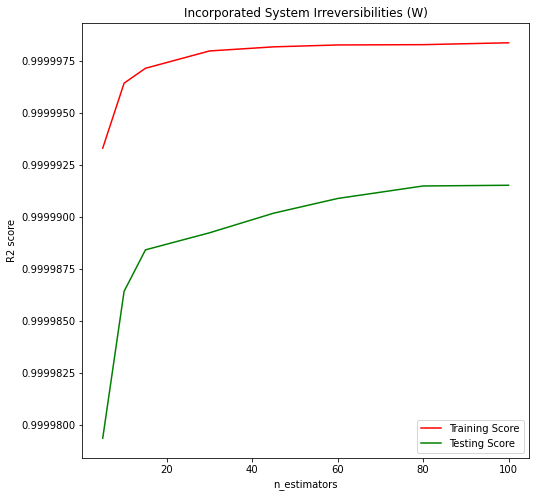

In [87]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Irreversibilities"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(r2_score(y_train1["Irreversibilities"], rf.predict(xtrain1)))
    testresults.append(r2_score(y_test1["Irreversibilities"], ypredicted1))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
axes.ticklabel_format(useOffset=False)
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Incorporated System Irreversibilities (W)")
plt.legend()
plt.savefig("diagram33.jpg", dpi = 400)

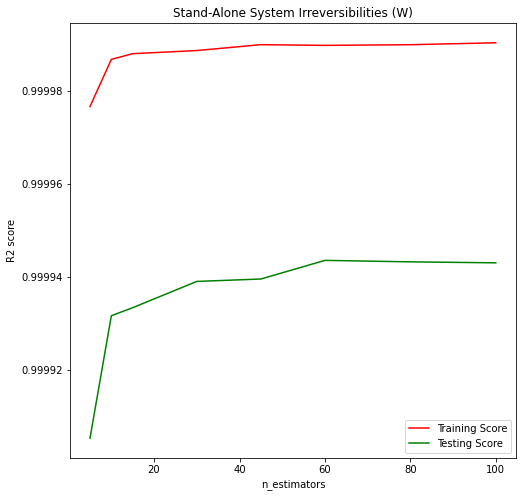

In [88]:
#Stand-alone system
trainresults1= []
testresults1 = []
for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Irreversibilities"])
    ypredicted2 = rf.predict(xtest2)
    trainresults1.append(r2_score(y_train2["Irreversibilities"], rf.predict(xtrain2)))
    testresults1.append(r2_score(y_test2["Irreversibilities"], ypredicted2))

fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults1, color="r", label="Training Score")
axes.plot(trees, testresults1, color="g", label="Testing Score")
axes.ticklabel_format(useOffset=False)
plt.xlabel("n_estimators")
plt.ylabel("R2 score")
plt.title("Stand-Alone System Irreversibilities (W)")
plt.legend()
plt.savefig("diagram34.jpg", dpi = 400)

# Learning rate curves- RMSE

(i) Output power

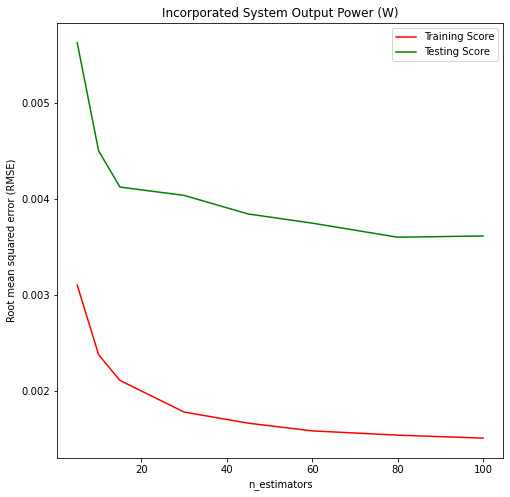

In [89]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Output_power"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(np.sqrt(mean_squared_error(y_train1["Output_power"], rf.predict(xtrain1))))
    testresults.append(np.sqrt(mean_squared_error(y_test1["Output_power"], ypredicted1)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Incorporated System Output Power (W)")
plt.legend()
plt.savefig("diagram35.jpg", dpi = 400)

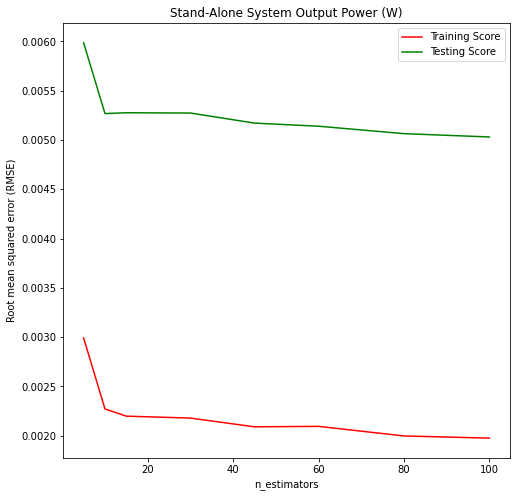

In [90]:
#Stand-alone system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Output_power"])
    ypredicted2 = rf.predict(xtest2)
    trainresults.append(np.sqrt(mean_squared_error(y_train2["Output_power"], rf.predict(xtrain2))))
    testresults.append(np.sqrt(mean_squared_error(y_test2["Output_power"], ypredicted2)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Stand-Alone System Output Power (W)")
plt.legend()
plt.savefig("diagram36.jpg", dpi = 400)

(ii) Energy Efficiency

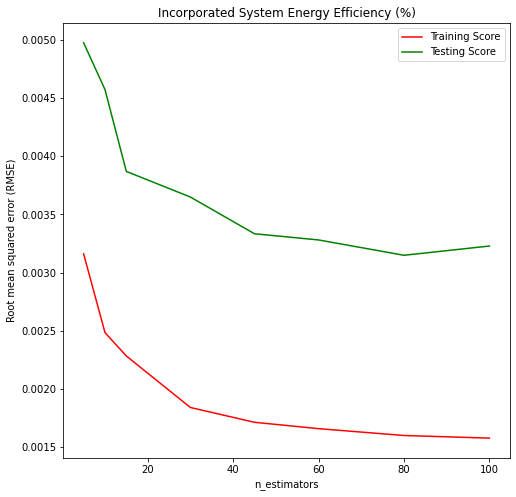

In [91]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Energy_efficiency"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(np.sqrt(mean_squared_error(y_train1["Energy_efficiency"], rf.predict(xtrain1))))
    testresults.append(np.sqrt(mean_squared_error(y_test1["Energy_efficiency"], ypredicted1)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Incorporated System Energy Efficiency (%)")
plt.legend()
plt.savefig("diagram37.jpg", dpi = 400)

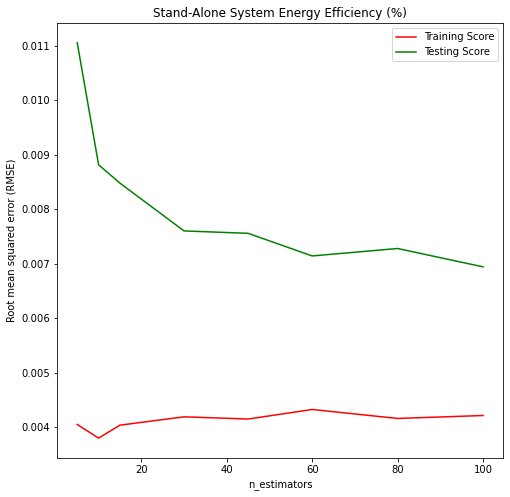

In [92]:
#Stand-alone system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Energy_efficiency"])
    ypredicted2 = rf.predict(xtest2)
    trainresults.append(np.sqrt(mean_squared_error(y_train2["Energy_efficiency"], rf.predict(xtrain2))))
    testresults.append(np.sqrt(mean_squared_error(y_test2["Energy_efficiency"], ypredicted2)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Stand-Alone System Energy Efficiency (%)")
plt.legend()
plt.savefig("diagram38.jpg", dpi = 400)

(iii) Exergy Efficiency

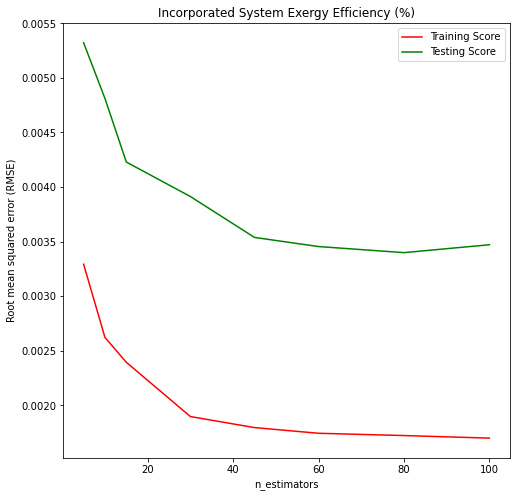

In [93]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Exergy_efficiency"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(np.sqrt(mean_squared_error(y_train1["Exergy_efficiency"], rf.predict(xtrain1))))
    testresults.append(np.sqrt(mean_squared_error(y_test1["Exergy_efficiency"], ypredicted1)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Incorporated System Exergy Efficiency (%)")
plt.legend()
plt.savefig("diagram39.jpg", dpi = 400)

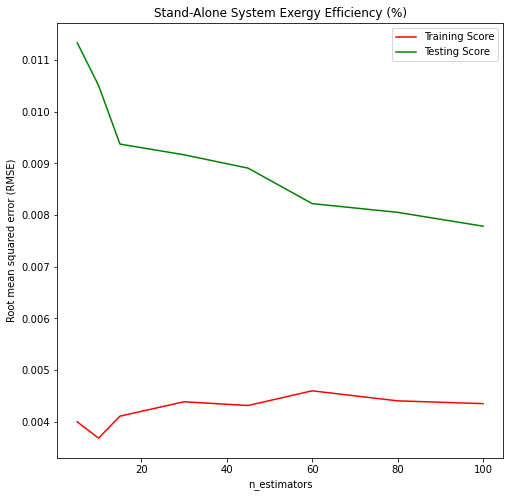

In [94]:
#Stand-alone system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Exergy_efficiency"])
    ypredicted2 = rf.predict(xtest2)
    trainresults.append(np.sqrt(mean_squared_error(y_train2["Exergy_efficiency"], rf.predict(xtrain2))))
    testresults.append(np.sqrt(mean_squared_error(y_test2["Exergy_efficiency"], ypredicted2)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Stand-Alone System Exergy Efficiency (%)")
plt.legend()
plt.savefig("diagram40.jpg", dpi = 400)

(iv) Entropy Generation

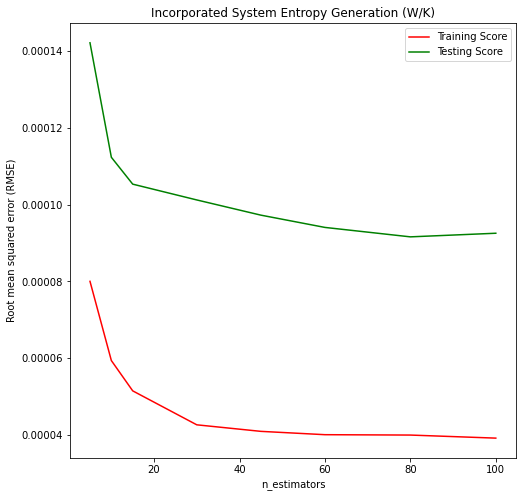

In [95]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Entropy_Generation"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(np.sqrt(mean_squared_error(y_train1["Entropy_Generation"], rf.predict(xtrain1))))
    testresults.append(np.sqrt(mean_squared_error(y_test1["Entropy_Generation"], ypredicted1)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Incorporated System Entropy Generation (W/K)")
plt.legend()
plt.savefig("diagram41.jpg", dpi = 400)

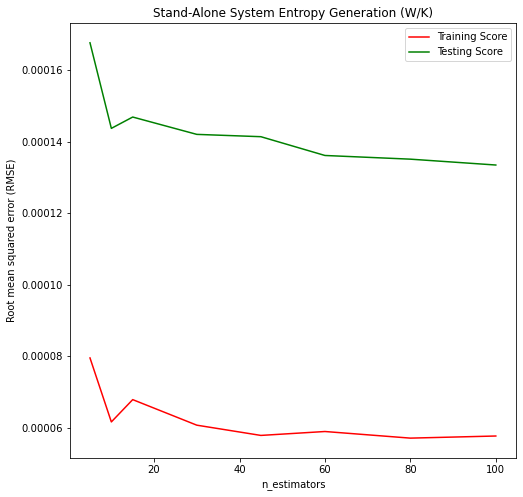

In [96]:
#Stand-alone system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Entropy_Generation"])
    ypredicted2 = rf.predict(xtest2)
    trainresults.append(np.sqrt(mean_squared_error(y_train2["Entropy_Generation"], rf.predict(xtrain2))))
    testresults.append(np.sqrt(mean_squared_error(y_test2["Entropy_Generation"], ypredicted2)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Stand-Alone System Entropy Generation (W/K)")
plt.legend()
plt.savefig("diagram42.jpg", dpi = 400)

(v) Irreversibilities

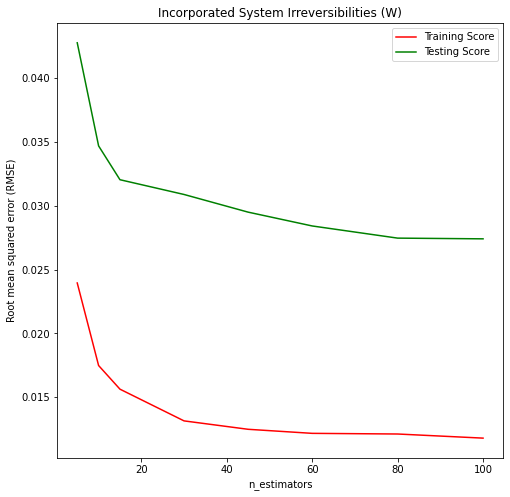

In [97]:
#Incorporated system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain1, y_train1["Irreversibilities"])
    ypredicted1 = rf.predict(xtest1)
    trainresults.append(np.sqrt(mean_squared_error(y_train1["Irreversibilities"], rf.predict(xtrain1))))
    testresults.append(np.sqrt(mean_squared_error(y_test1["Irreversibilities"], ypredicted1)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Incorporated System Irreversibilities (W)")
plt.legend()
plt.savefig("diagram43.jpg", dpi = 400)

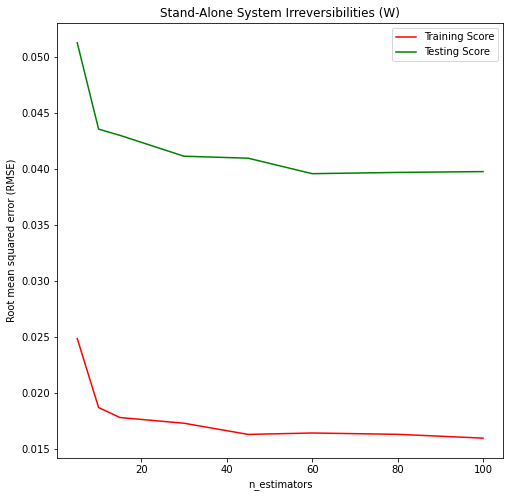

In [98]:
#Stand-alone system
trees = [5, 10, 15, 30, 45, 60, 80, 100]
trainresults= []
testresults = []

for i in trees:
    rf = RandomForestRegressor(n_estimators = i, random_state = 0)
    rf.fit(xtrain2, y_train2["Irreversibilities"])
    ypredicted2 = rf.predict(xtest2)
    trainresults.append(np.sqrt(mean_squared_error(y_train2["Irreversibilities"], rf.predict(xtrain2))))
    testresults.append(np.sqrt(mean_squared_error(y_test2["Irreversibilities"], ypredicted2)))


fig = plt.figure(figsize = (8, 8))
axes = fig.add_subplot(1,1,1)

axes.plot(trees, trainresults, color="r", label="Training Score")
axes.plot(trees, testresults, color="g", label="Testing Score")
plt.xlabel("n_estimators")
plt.ylabel("Root mean squared error (RMSE)")
plt.title("Stand-Alone System Irreversibilities (W)")
plt.legend()
plt.savefig("diagram44.jpg", dpi = 400)